# What is the Bandit problem?
## Introduction
Ex. slot machine

* You try to earn the return from **K=5** slot machines. 
* The chance is **N=100** times.
* You don't know the probability function of each return.

From the example, you can find
* Your goal is to reach the maximum return under **the trade-off between exploration(探索) and exploitation(知識利用)**.
    - Explore an option that looks inferior
    - Exploit the currently best looking option
* Bandit problem consists of **policys(方策)**, which player can select, and **returns(報酬)** from each policy.
* we call the example multi-armed bandit problem, especially K-armed bandit problem.

Other examples are below.
```1.crinical trial, 2.internet advertising, 3.recommender system, 4.game tree search, 5.online routing
```

## classification
### problem classification and its level
- stochastic bandit [Level 1]
- adversarial bandit
    * oblivious adversary [Level 2]
    * adaptive adversary [Level 3]

### evaluation of player's policy - rewords
- cumulative reword on finite horizon (reently main)
- geometric discounted reword on infinite horizon
- anytime stoppable

### evaluation of player's policy - regret
- regret
- expected regret
- pseudo-regret

To evaluate player's policy, the difference between the ideal target policy and player's policy is calculated, which called **regret**.

$$ \mbox{Regret}(T) = \max_{i \in 1, ..., K} \sum^T_{t=1} X_i (t) - \sum^T_{t=1} X_{i(t)}(t) $$
$$ \mathbb{E} [ \mbox{Regret}(T)] = \mathbb{E} \left[ \max_{i \in 1, ..., K} \sum^T_{t=1} X_i (t) - \sum^T_{t=1} X_{i(t)}(t) \right] $$
$$ \overline{\mbox{Regret}}(T) = \max_{i \in 1, ..., K} \mathbb{E} \left[ \sum^T_{t=1} X_i (t) - \sum^T_{t=1} X_{i(t)}(t) \right] $$

## History
Year | Person | Content | study
--- | --- | --- | ---
*1933* | William R. Thompson | Multi-Armed Bandits | clinical trial
** |  | |

---

# Basic mathmathecis complehension
Example of stochastic bandit problem　is like below.

「ある公告の現在のクリック率$\hat{\mu}$が5%以下のとき、真のクリック率$\mu$が$10\%$である可能性は？」

we explain 4 approximations and show the example about Bernoulli probability with a mean $\mu$.

## 1. Center LImit Theorem: 中心極限定理
In probability theory, the central limit theorem states that, under certain circumstances, the probability distribution of the scaled mean of a random sample converges to a normal distribution as the sample size increases to infinity.

標準化された標本平均の分布は、標準正規分布に弱収束する。任意の$x \in \mathbb{R}$ で次が成り立つ。
$$ \lim_{n \rightarrow \infty} \mathbb{P} \left[ \frac{\sqrt{n}(\hat{\mu} - \mu) }{\sigma} \leq x \right] = \Phi (x) $$

<details><summary> Berry–Esseen theorem [link](https://en.wikipedia.org/wiki/Berry%E2%80%93Esseen_theorem) shows the relative error on the gaussian approximation for CLT </summary>
Under stronger assumptions, **the Berry–Esseen theorem**, or **Berry–Esseen inequality**, gives a more quantitative result, because it also specifies the rate at which this convergence takes place by **giving a bound on the maximal error of approximation between the normal distribution and the true distribution of the scaled sample mean**. The approximation is measured by **the Kolmogorov–Smirnov distance**. In the case of independent samples, <span style="color:tomato">the convergence rate is $n^{-1/2}$</span>, where n is the sample size, and the constant is estimated in terms of the third absolute normalized moments.
$${\displaystyle \left|F_{n}(x)-\Phi (x)\right|\leq {C\rho  \over \sigma ^{3}{\sqrt {n}}}}$$
</details>

<details><summary>Calculated values of the constant C have decreased markedly over the years, from the original value of **7.59** by Esseen (1942)</summary>, to **0.7882** by *van Beek (1972)*, then **0.7655** by *Shiganov (1986)*, then **0.7056** by *Shevtsova (2007)*, then **0.7005** by *Shevtsova (2008)*, then **0.5894** by *Tyurin (2009)*, then **0.5129** by *Korolev & Shevtsova (2009)*, then **0.4785** by *Tyurin (2010)*. The detailed review can be found in the papers *Korolev & Shevtsova (2009)*, 8Korolev & Shevtsova (2010)*. The best estimate as of 2012, **$C < 0.4748$**, follows from the inequality
$$ {\displaystyle \sup _{x\in \mathbb {R} }\left|F_{n}(x)-\Phi (x)\right|\leq {0.33554(\rho +0.415\sigma ^{3}) \over \sigma ^{3}{\sqrt {n}}},} $$
due to Shevtsova (2011), since $σ^3 ≤ ρ$ and $0.33554 · 1.415 < 0.4748$.
</details>

Bernoulli distribution is approximated as

$$ \mathbb{\hat{\mu} \leq x} \approx \Phi \left( \frac{\sqrt{n} ( x - \mu )}{\sqrt{\mu ( 1 - \mu )}} \right) $$

## 2. Hoeffding's inequality: ヘフディングの不等式
[link](https://en.wikipedia.org/wiki/Hoeffding%27s_inequality)

Hoeffding's inequality provides ***an upper bound on the probability that the sum of independent random variables deviates from its expected value by more than a certain amount***. Hoeffding's inequality was proved by Wassily Hoeffding in 1963

i.i.d randam variables $X_i \in [0, 1] $ と任意の$\Delta > 0$ について、

$$ \mathbb{P} [\hat{\mu}_n \leq \mu - \Delta] \leq e^{-2n\Delta^2} $$
$$ \mathbb{P} [\hat{\mu}_n \geq \mu + \Delta] \leq e^{-2n\Delta^2} $$

## 3. Chernoff-Hoeffding's inequality: チェルノフ-ヘフディングの不等式
It is explanined as Chernoff bound. [link](https://en.wikipedia.org/wiki/Chernoff_bound) 

In probability theory, the Chernoff bound, named after Herman Chernoff but due to Herman Rubin, gives exponentially decreasing bounds on tail distributions of sums of independent random variables. It is a sharper bound than the known first or second moment based tail bounds such as Markov's inequality or Chebyshev inequality, which only yield power-law bounds on tail decay. However, **the Chernoff bound requires that the variates be independent** – a condition that neither the Markov nor the Chebyshev inequalities require.

**Chernoff-Hoeffding Theorem.** Suppose $X_1, ..., X_n$ are i.i.d. random variables, taking values in $\{0, 1\}$. Let $p = \mathbb{E}[X_i]$ and $\epsilon > 0$. Then

$$ \Pr \left({\frac {1}{n}}\sum X_{i}\geq p+\varepsilon \right)\leq \left(\left({\frac {p}{p+\varepsilon }}\right)^{p+\varepsilon }{\left({\frac {1-p}{1-p-\varepsilon }}\right)}^{1-p-\varepsilon }\right)^{n}=e^{-D(p+\varepsilon \|p)n} $$

$$ \Pr \left({\frac {1}{n}}\sum X_{i}\leq p-\varepsilon \right)\leq \left(\left({\frac {p}{p-\varepsilon }}\right)^{p-\varepsilon }{\left({\frac {1-p}{1-p+\varepsilon }}\right)}^{1-p+\varepsilon }\right)^{n}=e^{-D(p-\varepsilon \|p)n} $$

where
$$ {\displaystyle D(x\|y)=x\ln {\frac {x}{y}}+(1-x)\ln \left({\frac {1-x}{1-y}}\right)} D(x\|y)=x\ln {\frac {x}{y}}+(1-x)\ln \left({\frac {1-x}{1-y}}\right) $$
is **the Kullback–Leibler divergence between Bernoulli distributed random variables with parameters x and y** respectively.

## 4. Large Deviation Principle
The ways from 1 to 3 impose the limit for a sample mean, but generally the sample distribution should be limitted.

大偏差原理とは、確率測度が集中する―大数の法則のようなものが成り立つ―ときに，集中する点から外れたところの測度の減衰の速さを記述するもの、とくに指数的に減衰する状況を問題にする。
確率論の流れとして、1. 平均値への収束を主張する大数の法則、2. 収束先の周りでの揺らぎを見る中心極限定理、3. 収束外の測度の指数関数的減衰を記述する大偏差原理

Donsker-Varadhan(1963) : 基本的なアイデアは「Brown 運動の軌跡の空間で Laplace原理の類似を示す」というもの、とのことらしい。[link](http://www.kurims.kyoto-u.ac.jp/~ryoki/talks/kinosaki-proc.pdf)

<details><summary>**Sanov's theorem** [link](https://en.wikipedia.org/wiki/Sanov%27s_theorem)</summary>
In information theory, **Sanov's theorem** gives a bound on the probability of observing an atypical sequence of samples from a given probability distribution.　 if A is the closure of its interior,

$$ {\displaystyle \lim _{n\to \infty }{\frac {1}{n}}\log q^{n}(x^{n})=-D_{\mathrm {KL} }(p^{*}||q).} \lim _{{n\to \infty }}{\frac  {1}{n}}\log q^{n}(x^{n})=-D_{{{\mathrm  {KL}}}}(p^{*}||q). $$

「分布Pからのサンプルｎ個があたかも分布Qからのものであるように振る舞う」事象の確率は、
$$ \mathbb{P} [\hat{P}_n \approx Q] \approx e^{-n D(Q||P)} $$

</details>


---

# Policy evaluation for stochastic bandit problem
Ex. K-armed stochastic bandit
* the number of arms: K
* return of each arm: $P_i = P(\mu_i)$
* best arm which realize the largest mean of return : $i^* = argmax_{i \in \{ 1, 2, ..., K \}} \mu_i $

we define the regret function as
\begin{align}
\mbox{regret} (T) &= \sum^T_{t=1} (\mu^* - \mu_{i(t)} ) \\
&= \sum_{i: \mu_i < \mu^* } (\mu^* - \mu_i) N_i(T+1) \\
&=\sum_{i: \mu_i < \mu^* } \Delta_i N_i(T+1) 
\end{align}
where $\Delta_i = \mu^* - \mu_i$ explain the difference of ideal return and selected arm return, $N_i(t)$ is the count the player select arm i until the beginning of time t.

$$ \mathbb{E} [\mbox{regret} (T)] = \sum_{i: \mu_i < \mu^* } \Delta_i \mathbb{E} [N_i(T+1)] $$

**Our goal is to minimize the expectation of regret the player select the policy.**

#### Bad example: player selects arm j without any rationale.
- if arm j is the best return arm $i^*$ by chance $j = i^*$, $N_i(T) = 0 $ for any arm i and **the player reaches no regret**.
- if arm j is not the best return arm $i^*$ by chance $j != i^*$, $N_i(T) != 0 $ for any arm i and **the player reaches much regrets**.

** Our target is how the player reachs minimum regret with rationale. ** From that view, the conception of **consitency** is defined below.
### consistency(一貫性)
ある方策が一貫性をもつとは、任意の固定した$a>0$と真の確率分布の組$\{ P_i \}^K_{i=1} \in \mathrm{P}^K$ に対して、その方策のもとで、
$$\mathbb{E} [\mbox{regret} (T)] = o(T^a)$$ 
が成り立つことをいう。

## regret lower bound for the consistent policy
$$\mathbb{E} [N_i(T)] \geq \frac{(1-o(1)) \log(T)}{D(P(\mu_i)|P(\mu^*))}$$ 
$$\mathbb{E} [\mbox{regret} (T)] \geq (1-o(1)) \log(T) \sum_{i: \mu_i < \mu^* } \frac{\Delta_i}{D(P(\mu_i)|P(\mu^*))}$$ 


In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### epsilon-greedy

In [3]:
class EpsilonGreedy():
    def __init__(self, epsilon, counts, values):
        self.epsilon = epsilon
        self.counts = counts
        self.values = values # average of rewards
        return

    def initialize(self, n_arms):
        self.counts = [0 for col in range(n_arms)]
        self.values = [0.0 for col in range(n_arms)]
        return

    def ind_max(self, x):
        return x.index(max(x))

    def select_arm(self):
        if random.random() > self.epsilon:
            return self.ind_max(self.values)
        else:
            return random.randrange(len(self.values))

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = float(self.counts[chosen_arm])
        value = self.values[chosen_arm]
        new_value = ((n-1)/n)*value + reward/n
        self.values[chosen_arm] = new_value
        return

class BernoulliArm():
    def __init__(self, p):
        self.p = p

    def draw(self):
        val = 0.0 if random.random() > self.p else 1.0
        return val

In [7]:
def test_algorithm(algo, arms, num_sims, horizon):
    chosen_arms = [0.0 for i in range(num_sims * horizon)]
    rewards = [0.0 for i in range(num_sims * horizon)]
    cumulative_rewards = [0.0 for i in range(num_sims * horizon)]
    sim_nums = [0.0 for i in range(num_sims * horizon)]
    times = [0.0 for i in range(num_sims * horizon)]

    for sim in range(num_sims):
        sim = sim + 1
        algo.initialize(len(arms))
        for t in range(horizon):
            t = t + 1
            index = (sim -1) * horizon + t - 1
            sim_nums[index] = sim
            times[index] = t

            chosen_arm = algo.select_arm()
            chosen_arms[index] = chosen_arm
            reward = arms[chosen_arms[index]].draw()
            rewards[index] = reward

            if t == 1:
                cumulative_rewards[index] = reward
            else:
                cumulative_rewards[index] = cumulative_rewards[index - 1] + reward

            algo.update(chosen_arm, reward)

    return [sim_nums, times, chosen_arms, rewards, cumulative_rewards]

random.seed(1)

means = [0.1, 0.1, 0.1, 0.4, 0.5]
n_arms = len(means)
random.shuffle(means)
arms = list(map(lambda mu: BernoulliArm(mu), means))
# print("Best arm is "+ str(ind_max(means)))

f = open("./standard_results.tsv", "w")

for epsilon in [0.1, 0.2, 0.3, 0.4, 0.5]:
    algo = EpsilonGreedy(epsilon, [], [])
    algo.initialize(n_arms)
    results = test_algorithm(algo, arms, 5000, 250)
    for i in range(len(results[0])):
        f.write(str(epsilon) + "\t")
        f.write("\t".join([str(results[j][i]) for j in range(len(results))]) + "\n")

f.close()

In [18]:
results = pd.read_csv("./standard_results.tsv", delimiter="\t",
                      names=['epsilon', 'sim_nums', 'times', 'chosen_arms', 'rewards', 'cumulative_rewards'])

In [35]:
results.head()

,epsilon,sim_nums,times,chosen_arms,rewards,cumulative_rewards
0,0.1,1,1,0,0.0,0.0
1,0.1,1,2,0,0.0,0.0
2,0.1,1,3,0,0.0,0.0
3,0.1,1,4,0,0.0,0.0
4,0.1,1,5,0,0.0,0.0


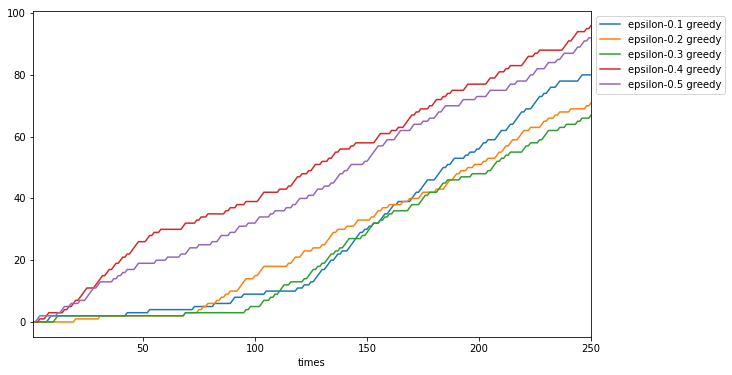

In [61]:
plt.figure(figsize=(10, 6))
for d_epsilon in [0.1, 0.2, 0.3, 0.4, 0.5]:
  first_sim = results.query('sim_nums==1 & epsilon== @d_epsilon').sort_values('times').set_index('times')['cumulative_rewards']
  first_sim.plot(label="epsilon-%s greedy"%d_epsilon)
plt.legend(bbox_to_anchor=(1, 1))

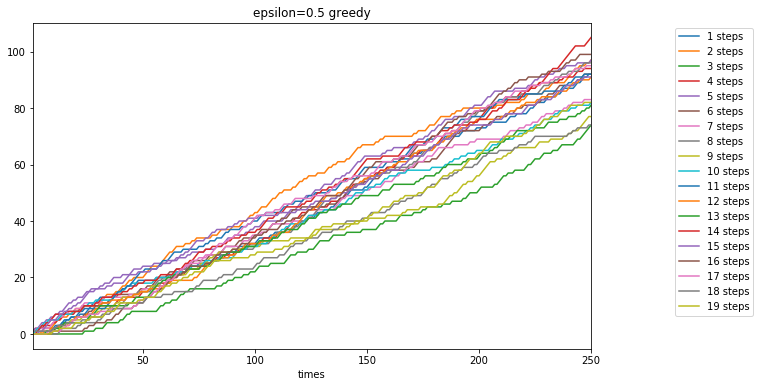

In [62]:
plt.figure(figsize=(10, 6))
for d_sim_num in range(1, 20):
  sim_cums = results.query('sim_nums==@d_sim_num & epsilon== 0.5').sort_values('times').set_index('times')['cumulative_rewards']
  sim_cums.plot(label="%s steps"%d_sim_num)
plt.title("epsilon=0.5 greedy")
plt.legend(bbox_to_anchor=(1.3, 1.0))

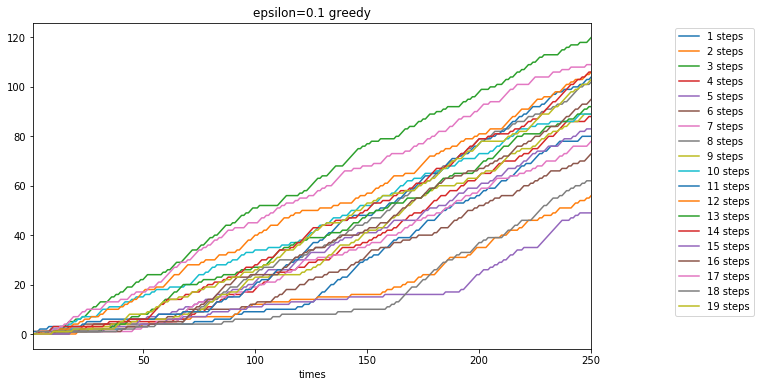

In [65]:
plt.figure(figsize=(10, 6))
for d_sim_num in range(1, 20):
  sim_cums = results.query('sim_nums==@d_sim_num & epsilon== 0.1').sort_values('times').set_index('times')['cumulative_rewards']
  sim_cums.plot(label="%s steps"%d_sim_num)
plt.title("epsilon=0.1 greedy")
plt.legend(bbox_to_anchor=(1.3, 1.0))